In [23]:
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [24]:
bhp = pd.read_csv("bhp.csv")
bhp.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [25]:
bhp['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [26]:
min_percenatl = bhp['price_per_sqft'].quantile(0.001)
max_percental = bhp['price_per_sqft'].quantile(0.999)
clean_data = bhp[(bhp['price_per_sqft'] >= min_percenatl) & (bhp['price_per_sqft'] <= max_percental)]
clean_data['price_per_sqft'].describe()

count    13172.000000
mean      6663.653735
std       4141.020700
min       1379.000000
25%       4271.000000
50%       5438.000000
75%       7311.000000
max      50349.000000
Name: price_per_sqft, dtype: float64

In [30]:
min = clean_data['price_per_sqft'].mean() - 4* clean_data['price_per_sqft'].std()
max = clean_data['price_per_sqft'].mean() + 4 * clean_data['price_per_sqft'].std()
clean_data = clean_data[(clean_data['price_per_sqft'] > min) & (clean_data['price_per_sqft'] < max)]

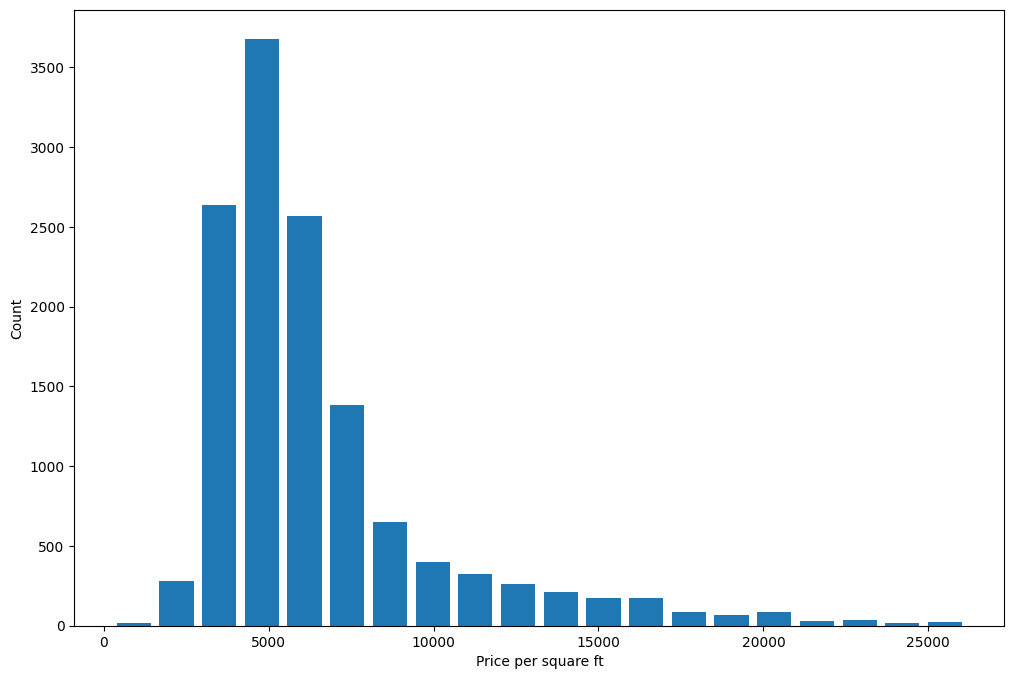

<Axes: xlabel='price_per_sqft', ylabel='Count'>

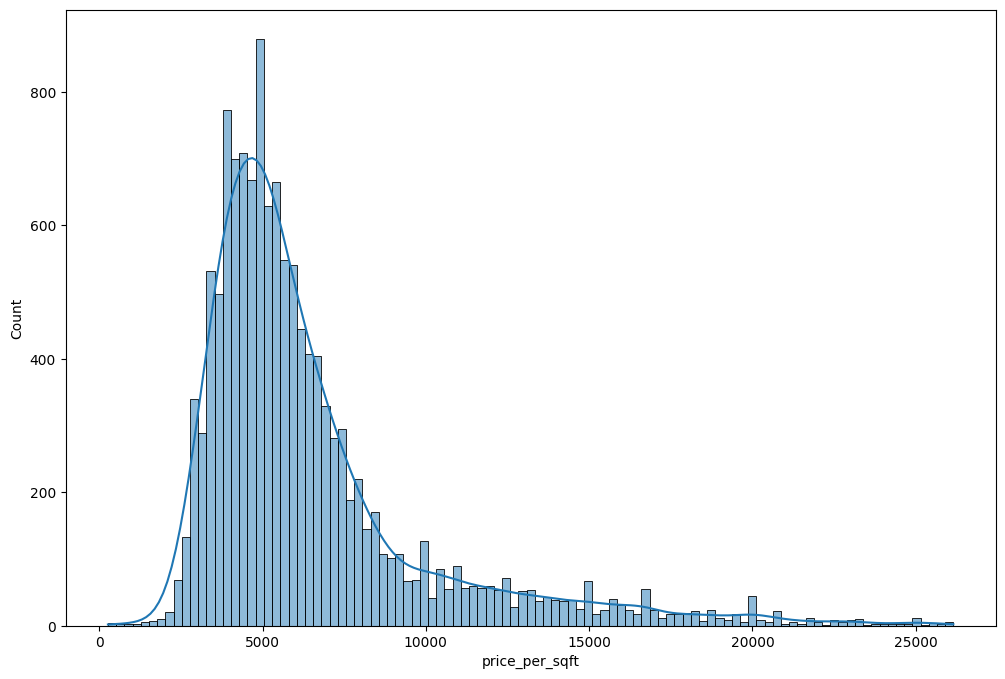

In [31]:
plt.hist(clean_data.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

sns.histplot(clean_data['price_per_sqft'], kde = True)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

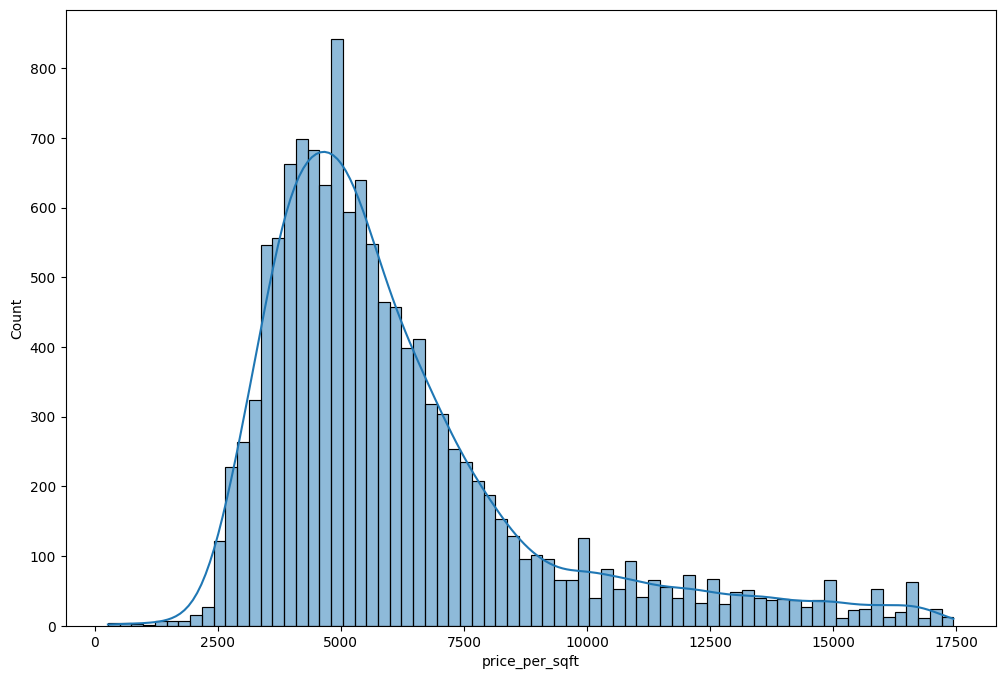

In [32]:
clean_data['Zscore'] = (clean_data['price_per_sqft'] - clean_data['price_per_sqft'].mean()) / clean_data['price_per_sqft'].std()
clean_data = clean_data[(clean_data['Zscore'] > -3) & (clean_data['Zscore'] < 3)]
sns.histplot(clean_data['price_per_sqft'], kde =True)